In [61]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [62]:
import pathlib 
import os
import  shutil

dir_path= pathlib.Path.cwd()
print(dir_path)
def read_file():
    dir_folder= pathlib.Path.cwd().parent
    input_path = dir_folder/ "data" / "diabetes"
    file_name = "diabetes.csv"
    df= pd.read_csv(os.path.join(input_path,file_name))
    return df

df = read_file()


c:\Abdelouaheb\perso\Ph\machine_learning_pipeline\diabetes


In [63]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())


##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [64]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [65]:
# Balanced or Unbalanced data 
round(df["Outcome"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

Outcome
0    65%
1    35%
Name: count, dtype: object

In [66]:
# univarie analysis 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


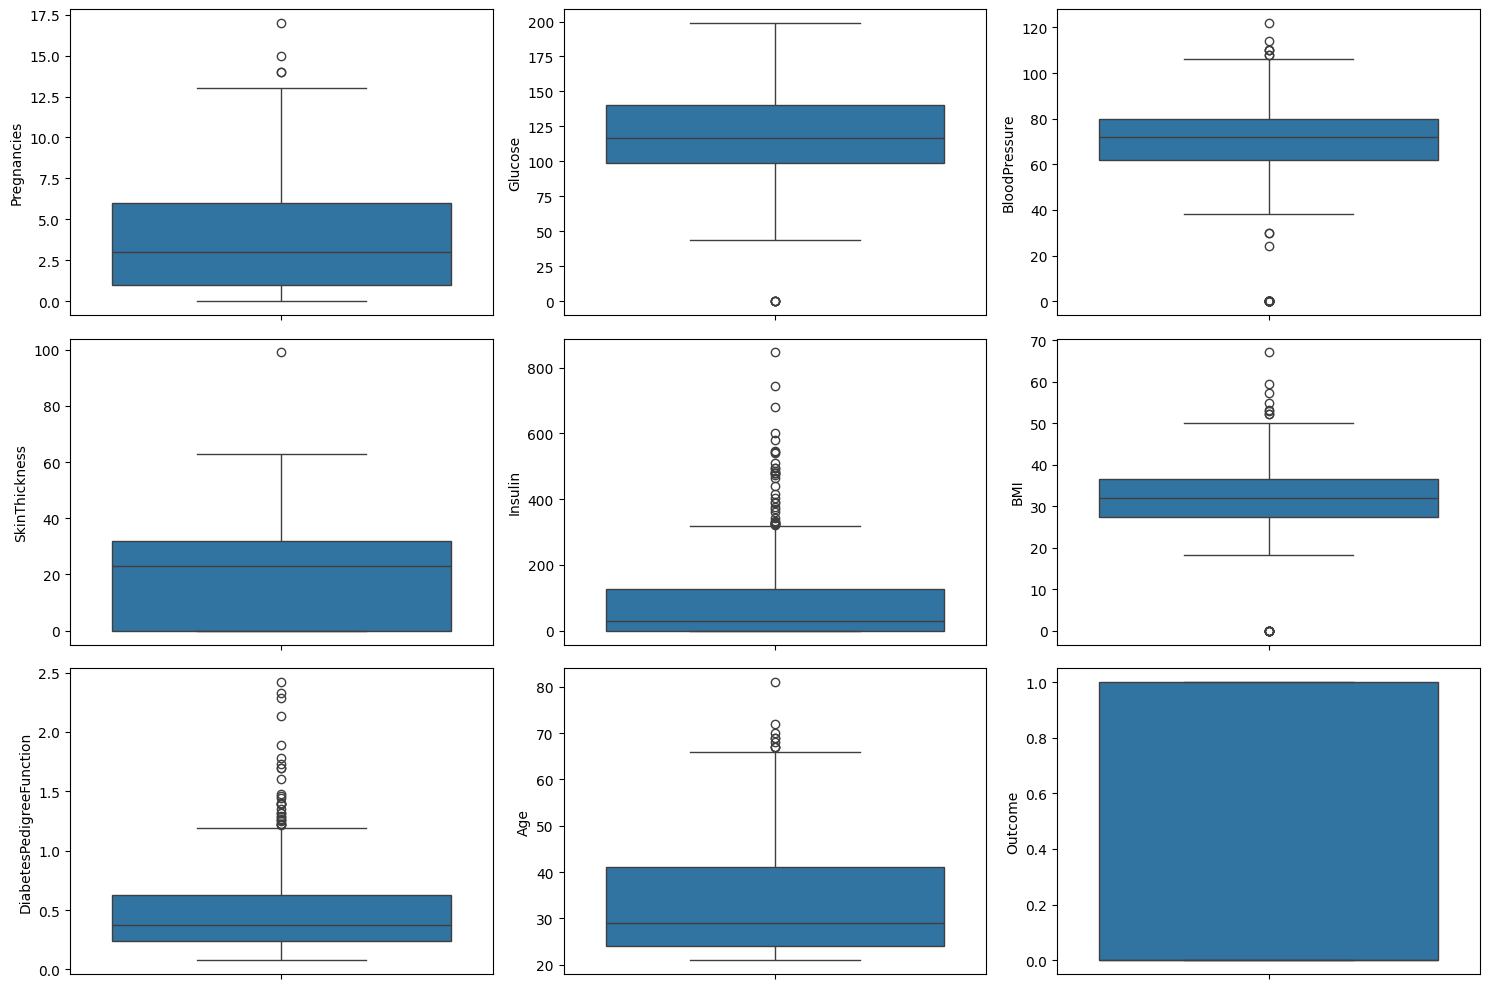

In [67]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()


In [68]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [69]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

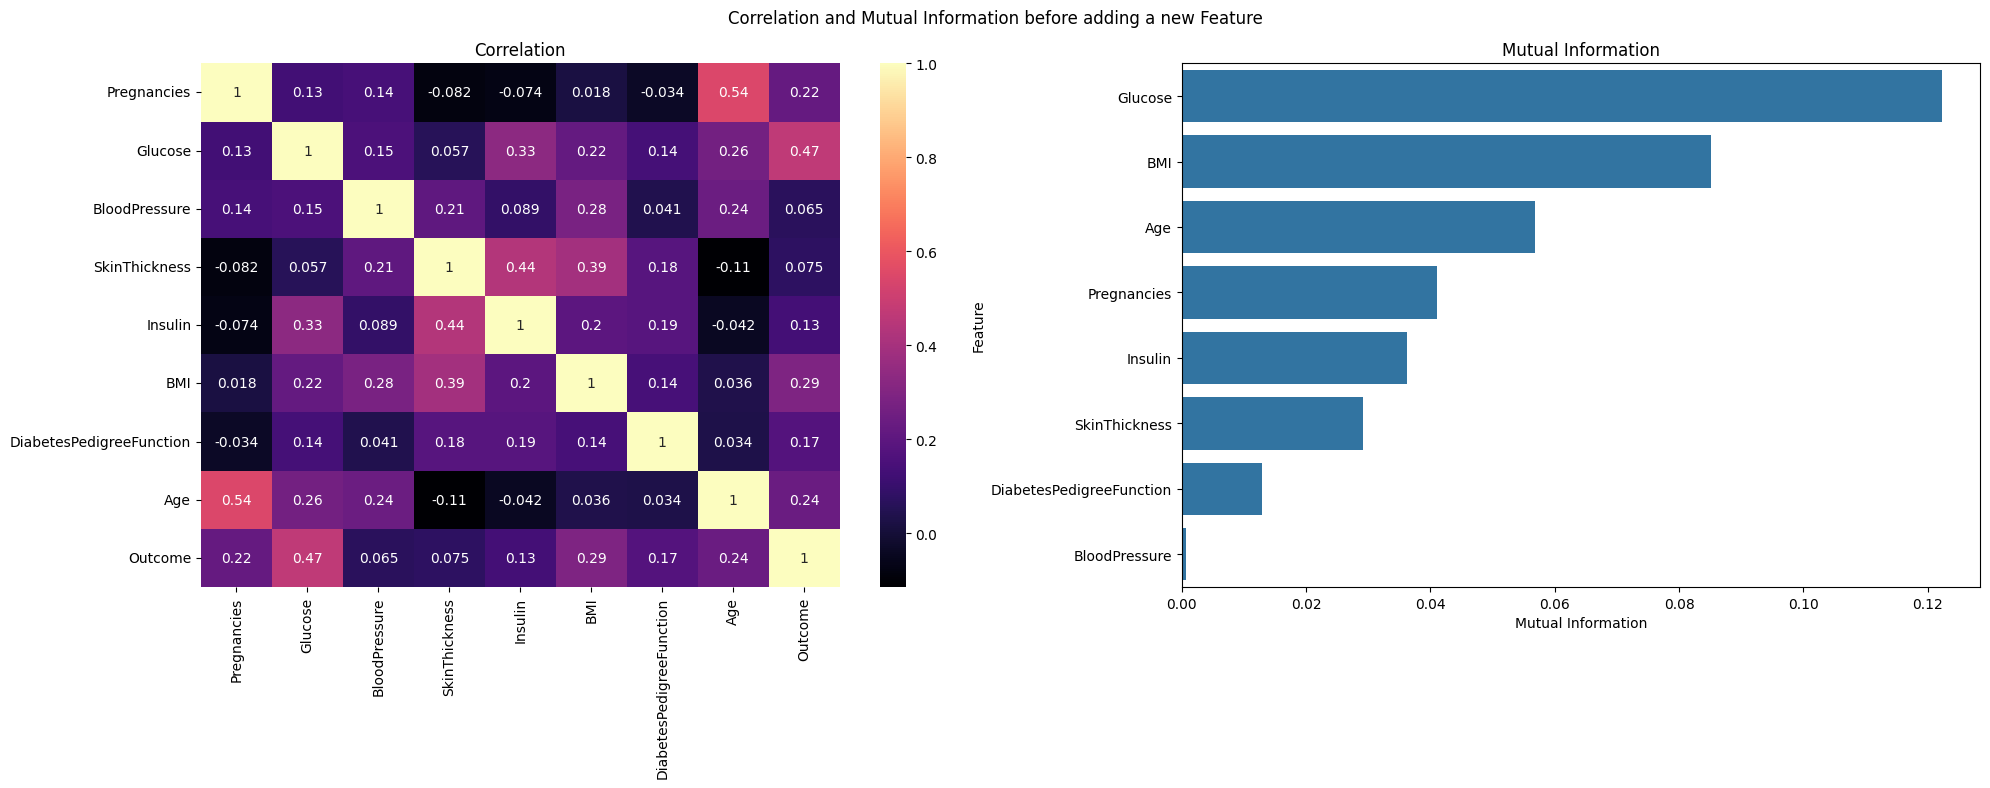

In [70]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

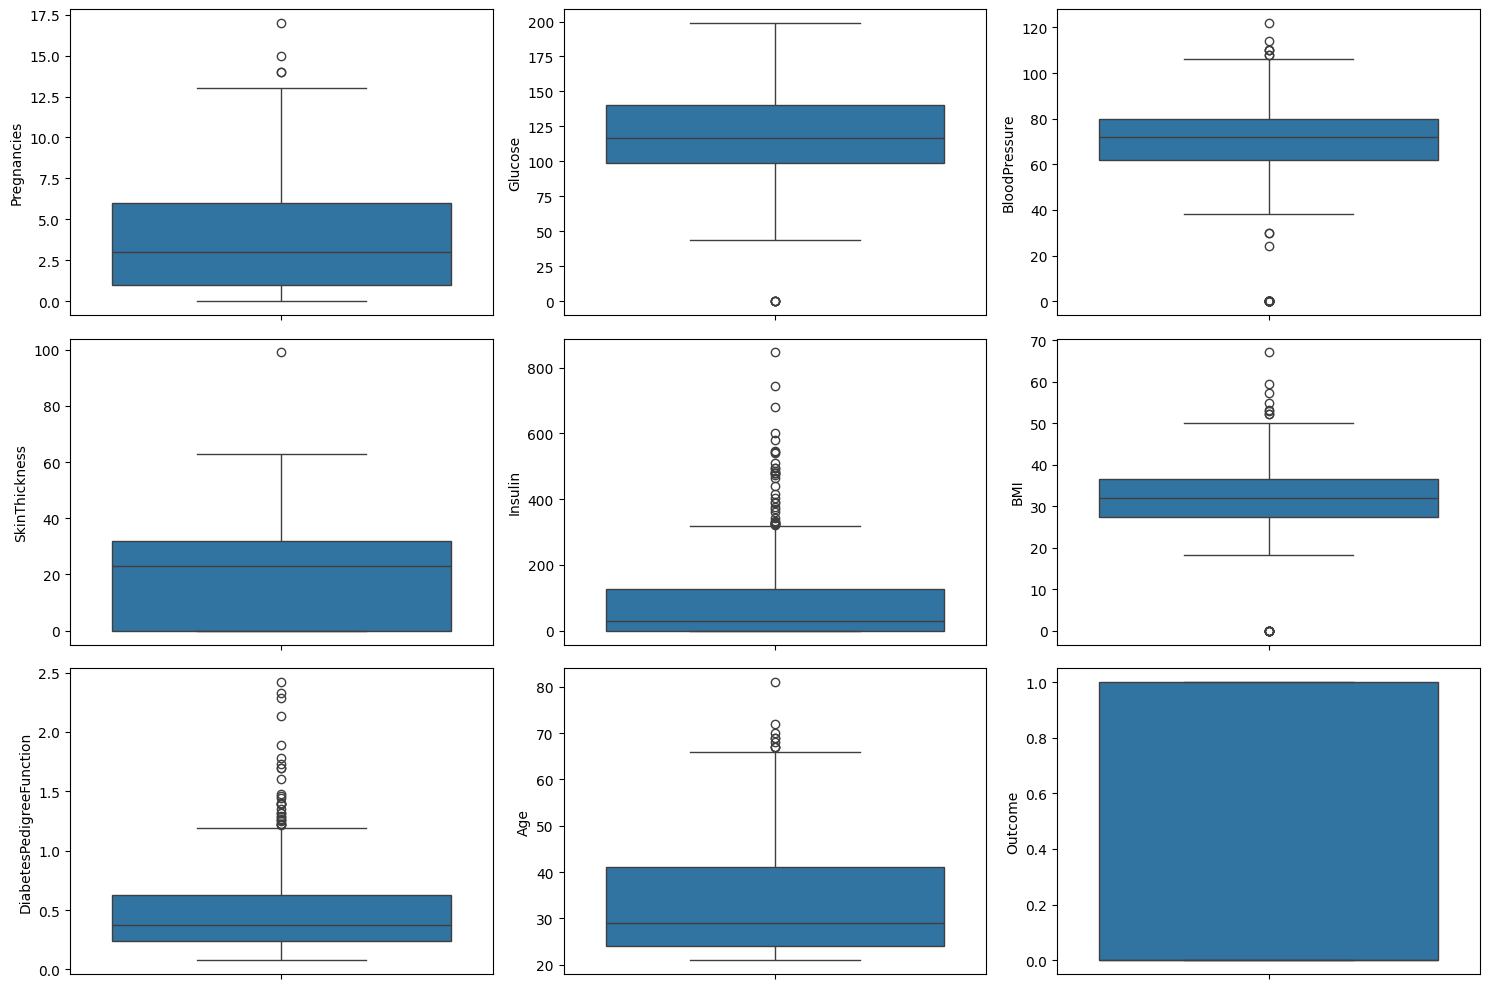

In [71]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

In [72]:
max = df['Age'].max()
min = df['Age'].min()
print(max,min)

81 21


In [73]:
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
on = OrdinalEncoder()

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,Normalized_Age
0,6,148,72,35,0,33.6,0.627,50,1,0,0.483333
1,1,85,66,29,0,26.6,0.351,31,0,3,0.166667
2,8,183,64,0,0,23.3,0.672,32,1,3,0.183333
3,1,89,66,23,94,28.1,0.167,21,0,3,0.000000
4,0,137,40,35,168,43.1,2.288,33,1,3,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0.700000
764,2,122,70,27,0,36.8,0.340,27,0,3,0.100000
765,5,121,72,23,112,26.2,0.245,30,0,3,0.150000
766,1,126,60,0,0,30.1,0.349,47,1,0,0.433333


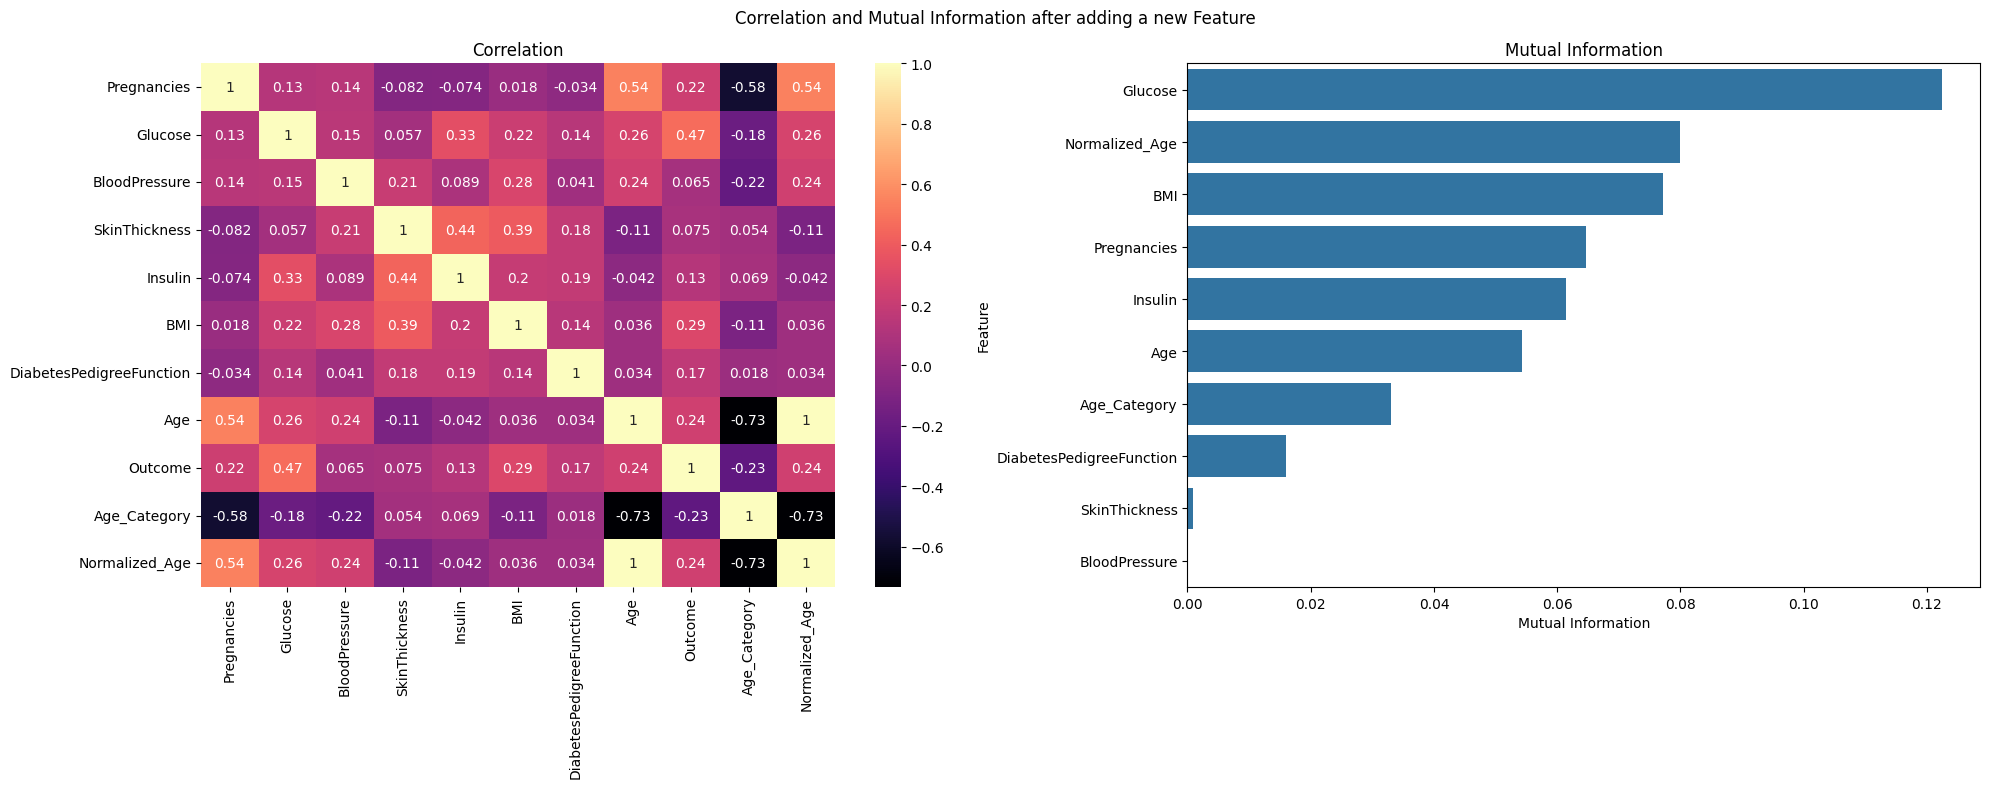

In [74]:
tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

In [ ]:
# df['Age_Category'].value_counts()
# def preprocess_origin_cols(df):
#     df["Age_Category"] = df["Age_Category"].map({0: "tenn",1: "adult", 2: "young", 3: "senior"})
#     return df
# data_tr = preprocess_origin_cols(data)
# data_tr.head()

In [75]:
# https://medium.com/@Coursesteach/supervised-learning-with-scikit-learn-part-11-removing-outliers-with-scikit-learn-59d6a2051d02
# Outliers
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Check if X is a DataFrame or NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # When X is a NumPy array, we need to handle columns by index
            data = pd.DataFrame(X)  # Convert it to DataFrame to make indexing easier
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Remove outliers
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
        return data.values


In [76]:
# replace outliers with bound 
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceBound(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the upper or lower bound
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Replace outliers in the data
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])  # Replace high outliers with the upper bound
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])  # Replace low outliers with the lower bound
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn



In [77]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceWithMedian(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the median value
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Compute the median of the column
            median = data[col].median()

            # Replace outliers with the median
            data[col] = np.where(data[col] > upper_bound, median, data[col])  # Replace high outliers with the median
            data[col] = np.where(data[col] < lower_bound, median, data[col])  # Replace low outliers with the median
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn


In [78]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='Outcome')
y= df['Outcome']

In [79]:
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20, stratify=y)

In [80]:
#importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [81]:
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

#numerics = ['int64', 'float64']
#num_data = data_tr.select_dtypes(include=numerics)

num_pipeline = Pipeline([
        ('outlier_remover', OutlierReplaceWithMedian(cols=[0, 2, 4, 5, 6, 7, 8, 9], threshold=1.5)),
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
])

X_train_scaler = num_pipeline.fit_transform(x_t)
X_test_scaler = num_pipeline.fit_transform(x_te)

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.base import BaseEstimator, TransformerMixin
# ordinal_cols = ['Age_Category']
# all_columns = list(x.columns.values)
# numerical_cols = [col for col in all_columns if col not in ordinal_cols]
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline([
#             ('outlier_remover', OutlierReplaceWithMedian(cols=numerical_cols, threshold=1.5)),
#             ('inputer', SimpleImputer(strategy='median')),
#             ('std_scaler', StandardScaler())
#         ]), ['numerical_columns']),  # Replace with actual numerical columns
#         ('ord', OrdinalEncoder(), ordinal_cols)  # Apply OrdinalEncoder to specific columns
#     ])
# X_train_scaler = num_pipeline.fit_transform(x_t)
# X_test_scaler = num_pipeline.fit_transform(x_te)

In [ ]:
# ##onehotencoding the categorical values
# from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
# from sklearn.compose import ColumnTransformer

# num_attrs = list(num_data)
# cat_attrs = ["Origin"]

# ##complete pipeline to transform 
# ##both numerical and cat. attributes
# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attrs),
#         ("cat", OneHotEncoder(), cat_attrs),
#     ])

# prepared_data = full_pipeline.fit_transform(data)
# prepared_data[0]

https://medium.com/@satyarepala/understanding-logistic-regression-a-step-by-step-explanation-9a404344964b
https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
Support Vector Machine In Python : https://medium.com/@soumallya160/everything-you-need-to-know-about-support-vector-machine-8e343658c9e7

In [ ]:
# lgc= LogisticRegression()
# training_start = time.perf_counter()
# # model=lgc.fit(x_t,y_t)
# # with scaler
# model=lgc.fit(X_train_scaler,y_t)
# training_end = time.perf_counter()
# prediction_start= time.perf_counter()
# y_pred =model.predict(X_test_scaler)
# y_pred_proba = model.predict_proba(x_te)
# prediction_end= time.perf_counter()
# #acc_Lgc= round(lgc.score(x_t,y_t)* 100, 2)
# acc_Lgc_train = model.score(X_train_scaler,y_t)
# acc_Lgc_test = model.score(X_test_scaler, y_te)
# Lgc_train_time = training_end-training_start
# Lgc_prediction_time = prediction_end-prediction_start
# #print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy is: %3.2f" % (acc_Lgc))
# print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Train set is: %3.2f" %(acc_Lgc_train)+ "%")
# print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Test set is: %3.2f" %(acc_Lgc_test)+ "%")
# print("Time consumed for training: %4.3f seconds" % (Lgc_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (Lgc_prediction_time))


Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Train set is: 0.75%
Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Test set is: 0.79%
Time consumed for training: 0.009 seconds
Time consumed for prediction: 0.00191 seconds


In [108]:
reg=LogisticRegression(max_iter=10000)
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
#nreg.fit(x_t,y_t)
nreg.fit(X_train_scaler,y_t)
print(nreg.best_params_)
print(nreg.best_score_)
nreg=nreg.best_estimator_
predt1=nreg.predict(X_train_scaler)
pred1=nreg.predict(X_test_scaler)
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'solver': 'saga', 'penalty': 'l2', 'C': 8}
0.7692075015124016


In [109]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(X_train_scaler,y_t)
print(nknn.best_params_)
print(nknn.best_score_)

nknn=nknn.best_estimator_
predt1=nknn.predict(X_train_scaler)
pred1=nknn.predict(X_test_scaler)
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'n_neighbors': 21}
0.7465819721718089


In [110]:
from sklearn.svm import SVC
svc = SVC()
params={"C" : [0.1, 1, 10, 100, 1000] ,"kernel":['linear', 'rbf', 'poly'],"degree" : [0, 1, 2, 3, 4, 5, 6],"gamma":[0.1, 1, 10, 100]}
svcc=RandomizedSearchCV(svc,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
svcc.fit(X_train_scaler,y_t)
print(svcc.best_params_)
print(svcc.best_score_)

svcc=svcc.best_estimator_
predt1=svcc.predict(X_train_scaler)
pred1=svcc.predict(X_test_scaler)
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, 'C': 1}
0.7656987295825771


In [27]:
def plot_svm_boundary(model,X,y):
    
    X = X
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

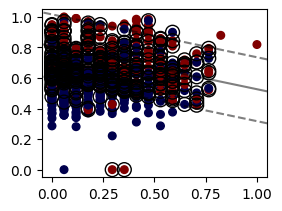

In [29]:
plt.subplot(2,2,1)
plot_svm_boundary(svcc_te,X_train_scaler,y_t)